In [148]:
import pandas as pd

In [149]:
df = pd.read_csv(r'C:\Users\suyog\NLP\dataset\train.csv')

In [150]:
df.head()

id     anchor                  target context  score
0  37d61fd2272659b1  abatement  abatement of pollution     A47   0.50
1  7b9652b17b68b7a4  abatement          act of abating     A47   0.75
2  36d72442aefd8232  abatement         active catalyst     A47   0.25
3  5296b0c19e1ce60e  abatement     eliminating process     A47   0.50
4  54c1e3b9184cb5b6  abatement           forest region     A47   0.00

In [151]:
df.describe(include='object')

id                       anchor       target context
count              36473                        36473        36473   36473
unique             36473                          733        29340     106
top     37d61fd2272659b1  component composite coating  composition     H01
freq                   1                          152           24    2186

In [152]:
df['input'] = 'TEXT1:' +df.context+' ;TEXT2:'+df.target+' ;ANC1:'+df.anchor

In [153]:
df.input.head()

0    TEXT1:A47 ;TEXT2:abatement of pollution ;ANC1:...
1      TEXT1:A47 ;TEXT2:act of abating ;ANC1:abatement
2     TEXT1:A47 ;TEXT2:active catalyst ;ANC1:abatement
3    TEXT1:A47 ;TEXT2:eliminating process ;ANC1:aba...
4       TEXT1:A47 ;TEXT2:forest region ;ANC1:abatement
Name: input, dtype: object

# Tokenization and Numericalization 
    Transformers uses a dataset object for storing a dataset

In [154]:
from datasets import Dataset,DatasetDict 
ds = Dataset.from_pandas(df)

In [155]:
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input'],
    num_rows: 36473
})

In [156]:
model_nm = 'microsoft/deberta-v3-small'
from transformers import AutoModelForSequenceClassification,AutoTokenizer
tokz = AutoTokenizer.from_pretrained(model_nm)

loading configuration file config.json from cache at C:\Users\suyog/.cache\huggingface\hub\models--microsoft--deberta-v3-small\snapshots\a36c739020e01763fe789b4b85e2df55d6180012\config.json
Model config DebertaV2Config {
  "_name_or_path": "microsoft/deberta-v3-small",
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-07,
  "max_position_embeddings": 512,
  "max_relative_positions": -1,
  "model_type": "deberta-v2",
  "norm_rel_ebd": "layer_norm",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "pooler_dropout": 0,
  "pooler_hidden_act": "gelu",
  "pooler_hidden_size": 768,
  "pos_att_type": [
    "p2c",
    "c2p"
  ],
  "position_biased_input": false,
  "position_buckets": 256,
  "relative_attention": true,
  "share_att_key": true,
  "transformers_version": "4.24.0",
  "type_vocab_size": 0,
  "vocab_size": 12810

Hugging Face Transformers library.

AutoModel for sequence classification model 

AutoToken for modle Tokenization

AutoTokenizer will create a tokenizer appropriate for a given model:

In [157]:
#albert model variant which is transformer-based model used for various natural language process tasks.
tokz = AutoTokenizer.from_pretrained('microsoft/deberta-v3-small')

loading configuration file config.json from cache at C:\Users\suyog/.cache\huggingface\hub\models--microsoft--deberta-v3-small\snapshots\a36c739020e01763fe789b4b85e2df55d6180012\config.json
Model config DebertaV2Config {
  "_name_or_path": "microsoft/deberta-v3-small",
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-07,
  "max_position_embeddings": 512,
  "max_relative_positions": -1,
  "model_type": "deberta-v2",
  "norm_rel_ebd": "layer_norm",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "pooler_dropout": 0,
  "pooler_hidden_act": "gelu",
  "pooler_hidden_size": 768,
  "pos_att_type": [
    "p2c",
    "c2p"
  ],
  "position_biased_input": false,
  "position_buckets": 256,
  "relative_attention": true,
  "share_att_key": true,
  "transformers_version": "4.24.0",
  "type_vocab_size": 0,
  "vocab_size": 12810

In [158]:
tokz.tokenize("A platypus is an ornithorhynchus anatinus.")

['▁A',
 '▁platypus',
 '▁is',
 '▁an',
 '▁or',
 'ni',
 'tho',
 'rhynch',
 'us',
 '▁an',
 'at',
 'inus',
 '.']

In [159]:
# function to tokenize the input.
# take one argument 'X'
def tok_func(x): return tokz(x["input"]) #'x' is assumed to be dictionary like object and it has a key "input"

In [160]:
#map is used to run the function quickly on every row. 
tok_ds = ds.map(tok_func, batched=True)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [161]:
for example in tok_ds:
    print(example)

{'id': '37d61fd2272659b1', 'anchor': 'abatement', 'target': 'abatement of pollution', 'context': 'A47', 'score': 0.5, 'input': 'TEXT1:A47 ;TEXT2:abatement of pollution ;ANC1:abatement', 'input_ids': [1, 54453, 435, 294, 558, 5753, 2600, 104917, 445, 294, 16191, 297, 17019, 265, 6435, 2600, 64097, 435, 294, 16191, 297, 17019, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '7b9652b17b68b7a4', 'anchor': 'abatement', 'target': 'act of abating', 'context': 'A47', 'score': 0.75, 'input': 'TEXT1:A47 ;TEXT2:act of abating ;ANC1:abatement', 'input_ids': [1, 54453, 435, 294, 558, 5753, 2600, 104917, 445, 294, 15482, 265, 266, 17441, 510, 2600, 64097, 435, 294, 16191, 297, 17019, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

{'id': 'e5b60a6a89c1d49f', 'anchor': 'androgen receptor modulators', 'target': 'mediator', 'context': 'C07', 'score': 0.0, 'input': 'TEXT1:C07 ;TEXT2:mediator ;ANC1:androgen receptor modulators', 'input_ids': [1, 54453, 435, 294, 711, 4649, 2600, 104917, 445, 294, 9758, 297, 698, 2600, 64097, 435, 294, 118311, 11349, 48341, 268, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '704b6869cb4fc74d', 'anchor': 'androgen receptor modulators', 'target': 'modular protein', 'context': 'C07', 'score': 0.25, 'input': 'TEXT1:C07 ;TEXT2:modular protein ;ANC1:androgen receptor modulators', 'input_ids': [1, 54453, 435, 294, 711, 4649, 2600, 104917, 445, 294, 111122, 2927, 2600, 64097, 435, 294, 118311, 11349, 48341, 268, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

{'id': 'bb1ee77ff9849574', 'anchor': 'bandedge', 'target': 'semiconductor', 'context': 'H01', 'score': 0.25, 'input': 'TEXT1:H01 ;TEXT2:semiconductor ;ANC1:bandedge', 'input_ids': [1, 54453, 435, 294, 1773, 3085, 2600, 104917, 445, 294, 40987, 48133, 2600, 64097, 435, 294, 10550, 9676, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '2552099f508ad04b', 'anchor': 'bandedge', 'target': 'short wavelength edge', 'context': 'H01', 'score': 0.5, 'input': 'TEXT1:H01 ;TEXT2:short wavelength edge ;ANC1:bandedge', 'input_ids': [1, 54453, 435, 294, 1773, 3085, 2600, 104917, 445, 294, 17622, 22646, 2363, 2600, 64097, 435, 294, 10550, 9676, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '866a5f71725de696', 'anchor': 'bandedge', 'target': 'transmission line', 'co

{'id': '4c8666af6567fe12', 'anchor': 'carburization', 'target': 'carburizing process', 'context': 'B23', 'score': 0.75, 'input': 'TEXT1:B23 ;TEXT2:carburizing process ;ANC1:carburization', 'input_ids': [1, 54453, 435, 294, 983, 3304, 2600, 104917, 445, 294, 25494, 81556, 568, 2600, 64097, 435, 294, 25494, 4757, 4820, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': 'fc1911c4df674b96', 'anchor': 'carburization', 'target': 'carburizing treatment', 'context': 'B23', 'score': 0.75, 'input': 'TEXT1:B23 ;TEXT2:carburizing treatment ;ANC1:carburization', 'input_ids': [1, 54453, 435, 294, 983, 3304, 2600, 104917, 445, 294, 25494, 81556, 1035, 2600, 64097, 435, 294, 25494, 4757, 4820, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '19eb67c56

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'id': '958b8e4de58b6c8b', 'anchor': 'mat sections', 'target': 'members', 'context': 'A63', 'score': 0.25, 'input': 'TEXT1:A63 ;TEXT2:members ;ANC1:mat sections', 'input_ids': [1, 54453, 435, 294, 558, 8540, 2600, 104917, 445, 294, 23036, 2600, 64097, 435, 294, 13261, 4341, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': 'e91b0642ca4bb9e2', 'anchor': 'mat sections', 'target': 'multiple mat section', 'context': 'A63', 'score': 0.5, 'input': 'TEXT1:A63 ;TEXT2:multiple mat section ;ANC1:mat sections', 'input_ids': [1, 54453, 435, 294, 558, 8540, 2600, 104917, 445, 294, 43362, 8358, 1317, 2600, 64097, 435, 294, 13261, 4341, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '10985b85c5d7798b', 'anchor': 'mat sections', 'target': 'multiple mat sections', 'context'

{'id': '805eca5563a8fe5e', 'anchor': 'multiplexed data', 'target': 'information', 'context': 'H03', 'score': 0.25, 'input': 'TEXT1:H03 ;TEXT2:information ;ANC1:multiplexed data', 'input_ids': [1, 54453, 435, 294, 1773, 3984, 2600, 104917, 445, 294, 23882, 2600, 64097, 435, 294, 43362, 982, 569, 514, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '3544fe68a57cab35', 'anchor': 'multiplexed data', 'target': 'input data', 'context': 'H03', 'score': 0.25, 'input': 'TEXT1:H03 ;TEXT2:input data ;ANC1:multiplexed data', 'input_ids': [1, 54453, 435, 294, 1773, 3984, 2600, 104917, 445, 294, 42177, 514, 2600, 64097, 435, 294, 43362, 982, 569, 514, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '009b916d2295cc11', 'anchor': 'multiplexed data', 'tar

{'id': '69fa4fcc998be5dc', 'anchor': 'optimal quantity', 'target': 'optimal taste', 'context': 'A01', 'score': 0.0, 'input': 'TEXT1:A01 ;TEXT2:optimal taste ;ANC1:optimal quantity', 'input_ids': [1, 54453, 435, 294, 558, 3085, 2600, 104917, 445, 294, 56253, 2448, 2600, 64097, 435, 294, 56253, 5384, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '27ffdbd53579a5d3', 'anchor': 'optimal quantity', 'target': 'optimal weather', 'context': 'A01', 'score': 0.0, 'input': 'TEXT1:A01 ;TEXT2:optimal weather ;ANC1:optimal quantity', 'input_ids': [1, 54453, 435, 294, 558, 3085, 2600, 104917, 445, 294, 56253, 1742, 2600, 64097, 435, 294, 56253, 5384, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '0093b3ef7c90e56e', 'anchor': 'optimal quantity', 'target': 'optimum quan

{'id': '392a76a87cf23501', 'anchor': 'pendent', 'target': 'pendent groups', 'context': 'A43', 'score': 0.5, 'input': 'TEXT1:A43 ;TEXT2:pendent groups ;ANC1:pendent', 'input_ids': [1, 54453, 435, 294, 558, 5848, 2600, 104917, 445, 294, 14096, 34535, 1303, 2600, 64097, 435, 294, 14096, 34535, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '2ddf655937ed52f2', 'anchor': 'pendent', 'target': 'pendent functional', 'context': 'A61', 'score': 0.5, 'input': 'TEXT1:A61 ;TEXT2:pendent functional ;ANC1:pendent', 'input_ids': [1, 54453, 435, 294, 558, 8848, 2600, 104917, 445, 294, 14096, 34535, 4120, 2600, 64097, 435, 294, 14096, 34535, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'id': '3a327bd9a126998f', 'anchor': 'pendent', 'target': 'combination patent', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [162]:
#new item is added to dataset called input_ids.
row = tok_ds[0]
row['input'], row['input_ids']

('TEXT1:A47 ;TEXT2:abatement of pollution ;ANC1:abatement',
 [1,
  54453,
  435,
  294,
  558,
  5753,
  2600,
  104917,
  445,
  294,
  16191,
  297,
  17019,
  265,
  6435,
  2600,
  64097,
  435,
  294,
  16191,
  297,
  17019,
  2])

In [163]:
#vocab is a list of tokenizer which contain a unique integer for every possible token string.
#for instance we can look them for word like _of in the string.
tokz.vocab['▁of']

265

In [164]:
tok_ds = tok_ds.rename_columns({'score':'labels'})

In [165]:
eval_df = pd.read_csv(r'C:\Users\suyog\NLP\dataset\test.csv')
eval_df.describe()

id      anchor                         target context
count                 36          36                             36      36
unique                36          34                             36      29
top     4112d61851461f60  el display  inorganic photoconductor drum     G02
freq                   1           2                              1       3

In [166]:
def f(x): return -3*x**2 + 2*x + 20

In [167]:
import numpy as np, matplotlib.pyplot as plt

def plot_function(f, min=-2.1, max=2.1, color='r'):
    x = np.linspace(min,max, 100)[:,None]
    plt.plot(x, f(x), color)

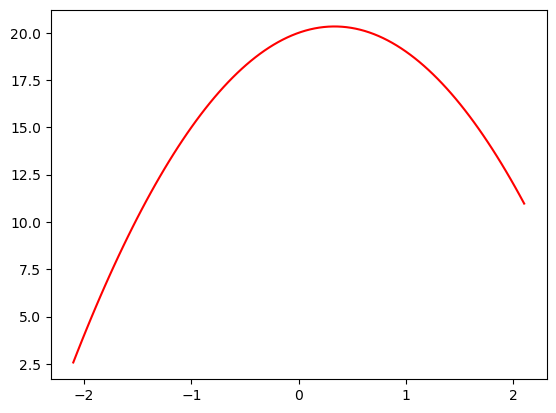

In [168]:
plot_function(f)

In [169]:
from numpy.random import normal,seed,uniform
np.random.seed(42)

In [170]:
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

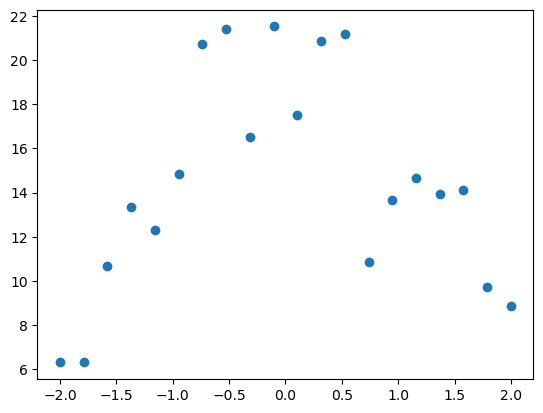

In [171]:
x = np.linspace(-2, 2, num=20)[:,None]
y = add_noise(f(x), 0.2, 1.3)
plt.scatter(x,y);

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    plt.scatter(x,y)
    plot_function(model.predict)

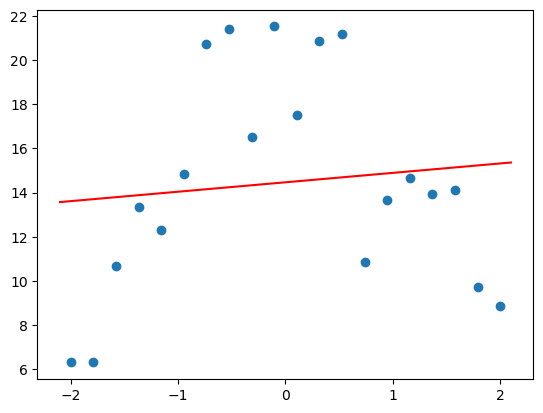

In [173]:
plot_poly(1)

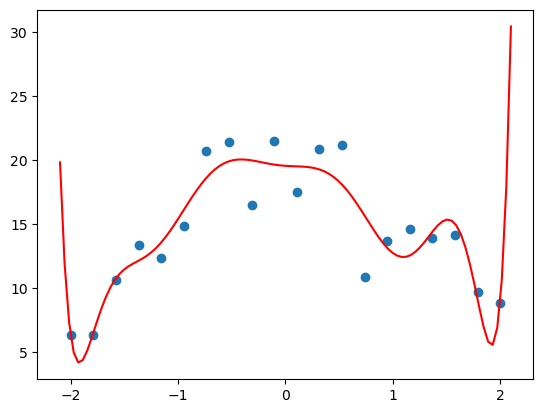

In [174]:
plot_poly(10)

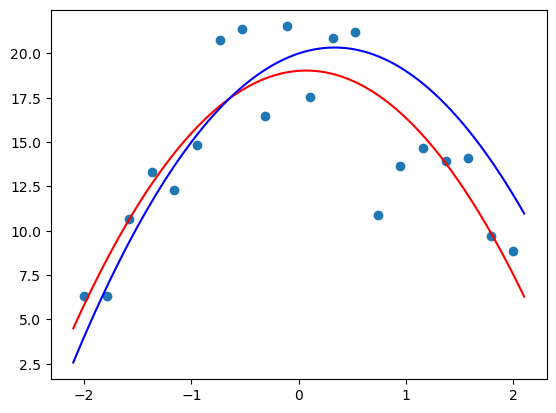

In [175]:
plot_poly(2)
plot_function(f, color='b')

In [176]:
dds = tok_ds.train_test_split(0.25, seed=42)
dds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9119
    })
})

In [177]:
eval_df['input'] = 'TEXT1: ' + eval_df.context + '; TEXT2: ' + eval_df.target + '; ANC1: ' + eval_df.anchor
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

In [178]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing = housing['data'].join(housing['target']).sample(1000, random_state=52)
housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
7506   3.0550      37.0  5.152778   1.048611       729.0  5.062500     33.92   
4720   3.0862      35.0  4.697897   1.055449      1159.0  2.216061     34.05   
12888  2.5556      24.0  4.864905   1.129222      1631.0  2.395007     38.66   
13344  3.0057      32.0  4.212687   0.936567      1378.0  5.141791     34.05   
7173   1.9083      42.0  3.888554   1.039157      1535.0  4.623494     34.05   

       Longitude  MedHouseVal  
7506     -118.28        1.054  
4720     -118.37        3.453  
12888    -121.35        1.057  
13344    -117.64        0.969  
7173     -118.19        1.192

In [179]:
np.set_printoptions(precision=2, suppress=True)
np.corrcoef(housing,rowvar=False)

array([[ 1.  , -0.12,  0.43, -0.08,  0.01, -0.07, -0.12,  0.04,  0.68],
       [-0.12,  1.  , -0.17, -0.06, -0.31,  0.  ,  0.03, -0.13,  0.12],
       [ 0.43, -0.17,  1.  ,  0.76, -0.09, -0.07,  0.12, -0.03,  0.21],
       [-0.08, -0.06,  0.76,  1.  , -0.08, -0.07,  0.09,  0.  , -0.04],
       [ 0.01, -0.31, -0.09, -0.08,  1.  ,  0.16, -0.15,  0.13,  0.  ],
       [-0.07,  0.  , -0.07, -0.07,  0.16,  1.  , -0.16,  0.17, -0.27],
       [-0.12,  0.03,  0.12,  0.09, -0.15, -0.16,  1.  , -0.93, -0.16],
       [ 0.04, -0.13, -0.03,  0.  ,  0.13,  0.17, -0.93,  1.  , -0.03],
       [ 0.68,  0.12,  0.21, -0.04,  0.  , -0.27, -0.16, -0.03,  1.  ]])

In [180]:
np.corrcoef(housing.MedInc, housing.MedHouseVal)

array([[1.  , 0.68],
       [0.68, 1.  ]])

In [181]:
def corr(x,y): return np.corrcoef(x,y) [0] [1]
corr(housing.MedInc, housing.MedHouseVal)

0.6760250732906004

In [182]:
def show_corr(df, a, b):
    x,y = df[a],df[b]
    plt.scatter(x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr(x, y):.2f}')

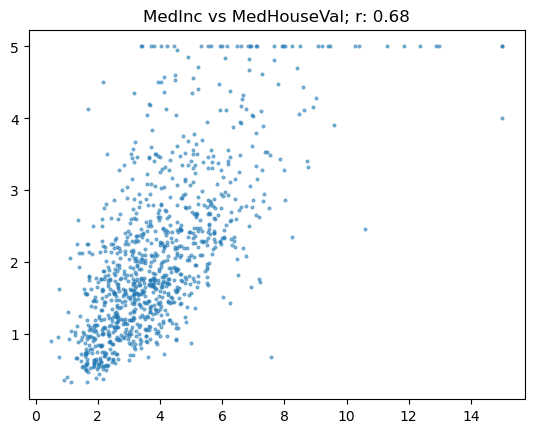

In [183]:
show_corr(housing, 'MedInc', 'MedHouseVal')

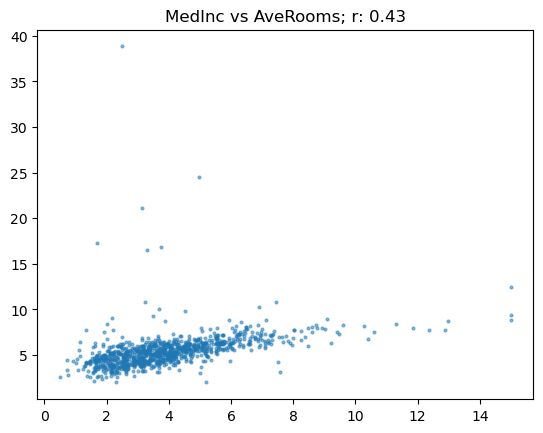

In [184]:
show_corr(housing, 'MedInc', 'AveRooms')

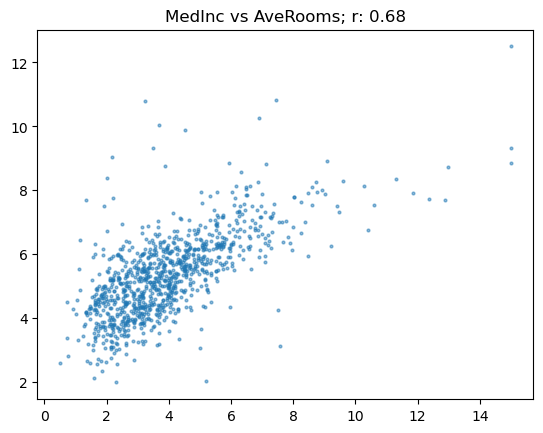

In [185]:
subset = housing[housing.AveRooms<15]
show_corr(subset, 'MedInc', 'AveRooms')

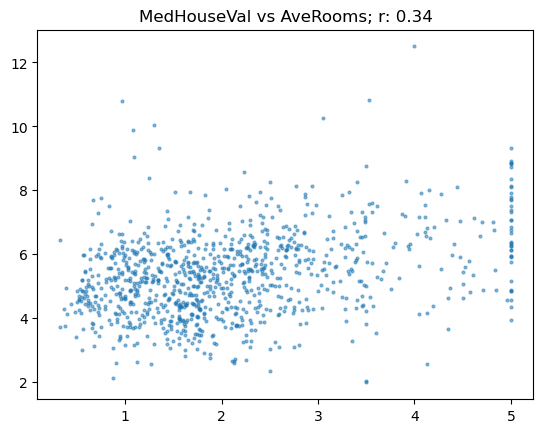

In [186]:
show_corr(subset, 'MedHouseVal', 'AveRooms')

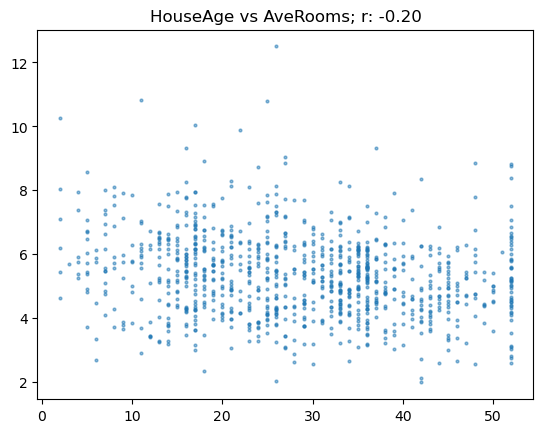

In [187]:
show_corr(subset, 'HouseAge', 'AveRooms')

In [188]:
def corr_d(eval_pred): return{'pearso'}

# Training Model

In [189]:
from transformers import TrainingArguments,Trainer

In [190]:
bs = 128
epochs = 4

In [191]:
# Important hyperparameter is learning rate. 
# Learning rate is highest enough which dosen't result in training failure.
lr = 8e-5

Transformers uses the TrainingArguments class to set up arguments.

In [192]:
args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=False,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none')

PyTorch: setting up devices


In [193]:
# Model and Trainer is created which is a class which combines the data and model together.

In [194]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)

loading configuration file config.json from cache at C:\Users\suyog/.cache\huggingface\hub\models--microsoft--deberta-v3-small\snapshots\a36c739020e01763fe789b4b85e2df55d6180012\config.json
Model config DebertaV2Config {
  "_name_or_path": "microsoft/deberta-v3-small",
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_eps": 1e-07,
  "max_position_embeddings": 512,
  "max_relative_positions": -1,
  "model_type": "deberta-v2",
  "norm_rel_ebd": "layer_norm",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "pooler_dropout": 0,
  "pooler_hidden_act": "gelu",
  "pooler_hidden_size": 768,
  "pos_att_type": [
    "p2c",
    "c2p"
  ],
  "position_biased_input": false,
  "position_buckets": 256,
  "relative_attention": true,
  "share_att_key": true,
  "

In [195]:
trainer = Trainer(model, args, train_dataset=dds['train'],eval_dataset=dds['test'], tokenizer=tokz, compute_metrics=corr_d)

In [196]:
trainer.train();

The following columns in the training set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: target, anchor, id, context, input. If target, anchor, id, context, input are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
C:\Users\suyog\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 27354
  Num Epochs = 4
  Instantaneous batch size per device = 128
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 1
  Total optimization steps = 856
  Number of trainable parameters = 141895681
You're using a DebertaV2TokenizerFast tokenizer. Please note tha

KeyboardInterrupt: 